In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import scipy.stats
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from matplotlib import pyplot
from numpy import concatenate
import math

In [20]:
df = pd.read_excel("CANDY CANE 101 - CLASS.xlsx")

In [21]:
df

,Type of Facility,Name of Facility,Timestamp,"Wellhead Casing ""A"" - Pressure","Wellhead Casing ""B"" - Pressure",Flowline Pressure,Flowline Temperature,Volume - Calendar Day Production,Wellhead Tubing - Pressure
0,Synthetic Data,CANDY CANE WELL 101,2017-08-24 16:58:00,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data
1,Synthetic Data,CANDY CANE WELL 101,2017-08-24 16:59:00,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data
2,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:00:00,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data
3,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:01:00,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data
4,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:02:00,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data,No Available Data
...,...,...,...,...,...,...,...,...,...
422373,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:31:00,1659.12,NaN,501.74,49.6577,3267.36,1496.08
422374,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:32:00,1659.12,NaN,501.777,49.6519,3268.22,1496.02
422375,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:33:00,1659.12,NaN,501.777,49.6519,3268.22,1496.02
422376,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:34:00,1659.12,NaN,501.777,49.6519,3268.22,1496.02


#### The first 64 rows with no avaliable data, I'm going to replace those values by 0. 

In [22]:
df["Wellhead Casing \"A\" - Pressure"].replace({'No Available Data':0}, inplace = True)
#For other missing data in "Wellhead Casing "B" - Pressure" we are ask to caculate as moving average of "Wellhead Casing "A" - Pressure"
df["Wellhead Casing \"B\" - Pressure"].replace({'No Available Data':0}, inplace = True)
df["Flowline Pressure"].replace({'No Available Data':0}, inplace = True)
df["Flowline Temperature"].replace({'No Available Data':0}, inplace = True)
df["Volume - Calendar Day Production"].replace({'No Available Data':0}, inplace = True)
df["Wellhead Tubing - Pressure"].replace({'No Available Data':0}, inplace = True)

#### From row number 285664 to 285723, we have 'the time is invaild', i'm going to replace those by their nearest vaild value

In [23]:

df["Wellhead Casing \"A\" - Pressure"].replace({'The time is invalid.':1777.839}, inplace = True)
df["Flowline Pressure"].replace({'The time is invalid.':585.0092}, inplace = True)
df["Flowline Temperature"].replace({'The time is invalid.': 80.60082}, inplace = True)
df["Volume - Calendar Day Production"].replace({'The time is invalid.': 7702.922}, inplace = True)
df["Wellhead Tubing - Pressure"].replace({'The time is invalid.': 847.9731}, inplace = True)

In [24]:
df

,Type of Facility,Name of Facility,Timestamp,"Wellhead Casing ""A"" - Pressure","Wellhead Casing ""B"" - Pressure",Flowline Pressure,Flowline Temperature,Volume - Calendar Day Production,Wellhead Tubing - Pressure
0,Synthetic Data,CANDY CANE WELL 101,2017-08-24 16:58:00,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
1,Synthetic Data,CANDY CANE WELL 101,2017-08-24 16:59:00,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
2,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:00:00,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
3,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:01:00,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
4,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:02:00,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
422373,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:31:00,1659.11792,NaN,501.739655,49.657749,3267.356689,1496.079346
422374,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:32:00,1659.11792,NaN,501.776886,49.651897,3268.222900,1496.019775
422375,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:33:00,1659.11792,NaN,501.776886,49.651897,3268.222900,1496.019775
422376,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:34:00,1659.11792,NaN,501.776886,49.651897,3268.222900,1496.019775


#### Changing all negative value to 0.

In [25]:
def replace_error_value(col):
    for i in range(len(col)):
        if(col[i] < 0):
            col[i] = col[i - 1]
    return col

In [26]:
df["Wellhead Casing \"A\" - Pressure"] = replace_error_value(df["Wellhead Casing \"A\" - Pressure"])
df["Flowline Pressure"] = replace_error_value(df["Flowline Pressure"])
df["Wellhead Tubing - Pressure"] = replace_error_value(df["Wellhead Tubing - Pressure"])
#caculate rolling mean for "Wellhead Casing "B" - Pressure" from "Wellhead Casing "A" - Pressure"
df["Wellhead Casing \"B\" - Pressure"] = df["Wellhead Casing \"A\" - Pressure"].rolling(3600).mean().fillna(0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
df

,Type of Facility,Name of Facility,Timestamp,"Wellhead Casing ""A"" - Pressure","Wellhead Casing ""B"" - Pressure",Flowline Pressure,Flowline Temperature,Volume - Calendar Day Production,Wellhead Tubing - Pressure
0,Synthetic Data,CANDY CANE WELL 101,2017-08-24 16:58:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Synthetic Data,CANDY CANE WELL 101,2017-08-24 16:59:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:01:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Synthetic Data,CANDY CANE WELL 101,2017-08-24 17:02:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
422373,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:31:00,1659.11792,1546.759593,501.739655,49.657749,3267.356689,1496.079346
422374,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:32:00,1659.11792,1546.800386,501.776886,49.651897,3268.222900,1496.019775
422375,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:33:00,1659.11792,1546.841180,501.776886,49.651897,3268.222900,1496.019775
422376,Synthetic Data,CANDY CANE WELL 101,2018-06-14 00:34:00,1659.11792,1546.881973,501.776886,49.651897,3268.222900,1496.019775


In [28]:
df.to_excel("CANDY.xlsx",
             sheet_name='Sheet1') 

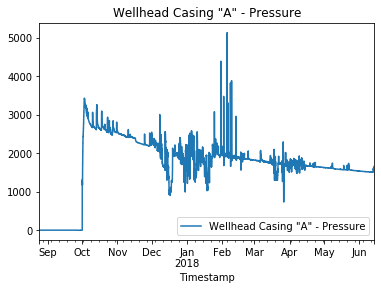

In [10]:
df.plot(x = "Timestamp", y = "Wellhead Casing \"A\" - Pressure", title = "Wellhead Casing \"A\" - Pressure")

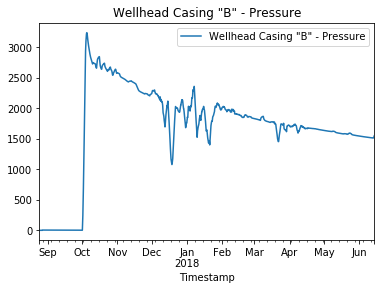

In [11]:
df.plot(x = "Timestamp", y = "Wellhead Casing \"B\" - Pressure", title = "Wellhead Casing \"B\" - Pressure")

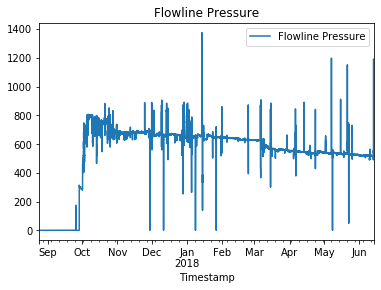

In [12]:
df.plot(x = "Timestamp", y = "Flowline Pressure", title = "Flowline Pressure")

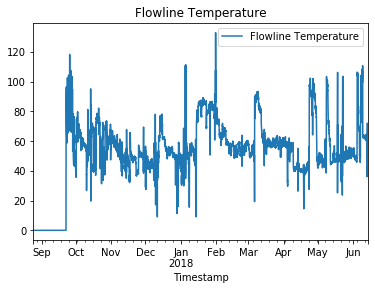

In [13]:
df.plot(x = "Timestamp", y = "Flowline Temperature", title = "Flowline Temperature")

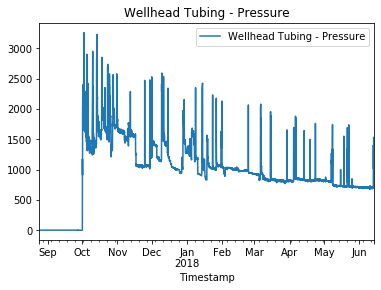

In [14]:
df.plot(x = "Timestamp", y = "Wellhead Tubing - Pressure", title = "Wellhead Tubing - Pressure")

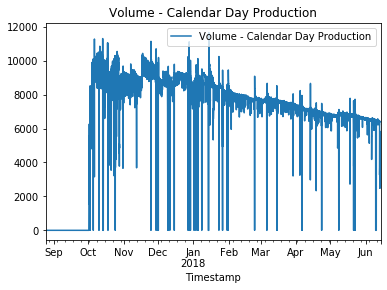

In [15]:
df.plot(x = "Timestamp", y = "Volume - Calendar Day Production", title = "Volume - Calendar Day Production")

#### Deferment is the reduction in Production or Injection Availability caused by an activity, breakdown, trip, poor equipment performance, or sub-optimum operations, that results in a reduction in the volume sold or injected, delaying the production or injection until some later time. So we are looking for a sudden drop down and immediatly back up data.

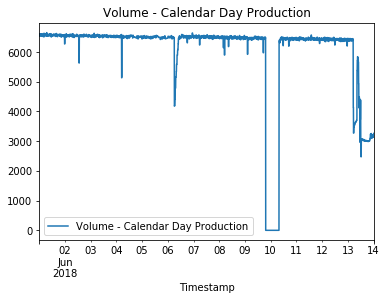

In [16]:
df_month = df[df["Timestamp"] > "6/1/2018  00:00:01 AM"]
df_month.plot(x ="Timestamp", y = "Volume - Calendar Day Production", title = "Volume - Calendar Day Production")

#### We can see that on 06/02,06/04 we have deferment since there are a period of time on those days the volume have a quick drop down and back to normal. On 06/10, we can see that instead of a quick back, the volume staying as 0 for a while which means it is not a deferment but a long period maintanence or equipment shut down. We are trying to find out those data are deferment.

#### I'm going to use rolling mean to detecte an outlier.
#### define confidence interval and  rolling mean outliers.

In [17]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


def rollingMeanOutlier(arr, window, ci = 0.95):
    #0 = normal, 1 = lower, 2 = upper
    outlier = []
    halfWind = int(np.round(window/2))
    for i in range(len(arr)):
        #when there is not enough element on left side
        if(i - (window/2) < 0):
            m,lcl, ucl = mean_confidence_interval(arr[0:window], confidence = ci)
        #when there is no element left on the right
        elif(i + (window/2) > len(arr)):
            m,lcl, ucl = mean_confidence_interval(arr[ len(arr) - window : len(arr)], confidence = ci)
        #there is enough element on both left and right
        else:
            m,lcl, ucl = mean_confidence_interval(arr[ i - halfWind : i + halfWind], confidence = ci)
        
        if(arr[i] < lcl):
            outlier.append(1)
        elif (arr[i] > ucl):
            outlier.append(2)
        else:
            outlier.append(0)
            
    return outlier        
    



In [18]:
a = [1,2,3,4,5,6,7,8,9,1000]
#CI for decide 1 is 1.036756838522439 4.9632431614775605, 1 < lcl, its an outlier, so labled 1 for too small
#CI for decide 1000 is -345.1261017701139 757.1261017701139, 1000 > ucl, its an outlier, so labled 2 for too large
#rest is 0 for within the range
rollingMeanOutlier(a, 5, ci = 0.95)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 2]

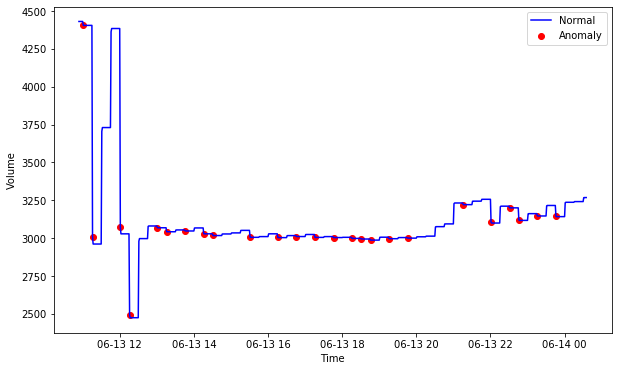

In [19]:
# we will test it on 2 weeks time stamp before full dataset is used
df_month = df[df["Timestamp"] > "6/13/2018  10:53:00 AM"].reset_index(drop=True)
class_label = rollingMeanOutlier(df_month['Volume - Calendar Day Production'], 11, ci = 0.99)

df_month['class'] = class_label
fig, ax = plt.subplots(figsize=(10,6))
a = df_month.loc[df_month['class'] == 1, ['Timestamp', 'Volume - Calendar Day Production']] #anomaly

ax.plot(df_month['Timestamp'], df_month['Volume - Calendar Day Production'], color='blue', label='Normal')
ax.scatter(a['Timestamp'],a['Volume - Calendar Day Production'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show();